In [52]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import lux
import yfinance as yf
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [1]:
ts = pd.read_csv('~/Documents/Classes/FS Data Science Immersive/Flatiron_Materials/Feb 1/nyc-dc-ds-020121/Phase_4/ds-time_series-main/data/Gun_Crimes_Heat_Map.csv')
ts['Date'] = pd.to_datetime(ts.Date)
ts_minute = ts.groupby('Date').count()['ID']
daily_count = ts_minute.resample('D').sum()
daily_count = daily_count[daily_count < 90]

ts_dr = pd.date_range(daily_count.index[0], daily_count.index[-1])
ts_daily = np.empty(shape=len(ts_dr))
ts_daily = pd.Series(ts_daily)
ts_daily = ts_daily.reindex(ts_dr)
ts_daily = ts_daily.fillna(daily_count)
ts_daily = ts_daily.interpolate()

ts_weekly = ts_daily.resample('W').mean()

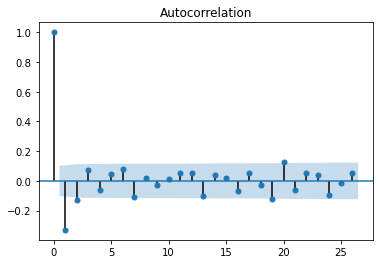

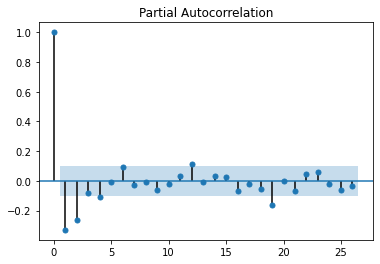

In [6]:
plot_acf(ts_weekly.diff().dropna());
plot_pacf(ts_weekly.diff().dropna());

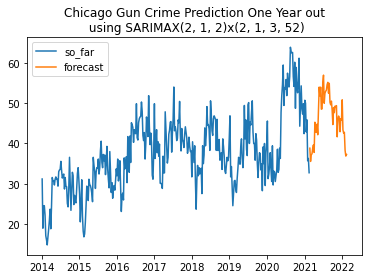

In [9]:
sari_mod =SARIMAX(ts_weekly,
                  order=(2, 1, 2),
                  seasonal_order=(2, 1, 3, 52),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()
forecast = sari_mod.forecast(steps=52)
fig, ax = plt.subplots()

ax.plot(ts_weekly, label='so_far')
ax.plot(forecast, label='forecast')
ax.set_title(f'Chicago Gun Crime Prediction One Year out\n using SARIMAX(2, 1, 2)x(2, 1, 3, 52)')

plt.legend();

In [11]:
# find the index which allows us to split off 20% of the data
cutoff = round(ts_weekly.shape[0]*0.8)
cutoff

298

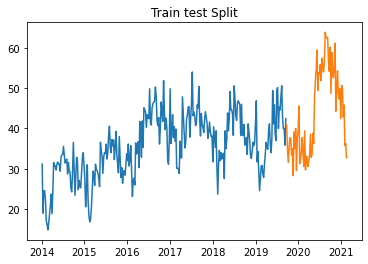

In [12]:
# Define train and test sets according to the index found above
train = ts_weekly[:cutoff]
test = ts_weekly[cutoff:]

fig, ax = plt.subplots()
ax.plot(train)
ax.plot(test)
ax.set_title('Train test Split');

In [13]:
sari_mod_test =SARIMAX(train,
                  order=(2, 1, 2),
                  seasonal_order=(2, 1, 3, 52),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

In [52]:
y_hat_train = sari_mod_test.predict(typ='levels')
y_hat_test = sari_mod_test.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')
\
ax.set_title(f'Chicago Gun Crime Prediction Train vs Test\n Using SARIMAX(2, 1, 2)x(2, 1, 3, 52)', fontdict = {'fontsize': 16})
plt.legend();

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

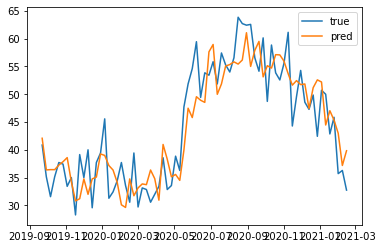

In [16]:
# Let's zoom in on test
fig, ax = plt.subplots()

ax.plot(test, label='true')
ax.plot(y_hat_test, label='pred')

plt.legend();

In [26]:
np.sqrt(mean_squared_error(test, y_hat_test))

4.74237944870573

In [43]:
ticker = 'GE'

In [45]:
df = yf.download(ticker, start='2017-01-01', end='2021-04-01', progress=False)

In [46]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [47]:
prices = df.Close

In [48]:
prices.head()

Date
2017-01-03    30.471153
2017-01-04    30.480768
2017-01-05    30.307692
2017-01-06    30.394232
2017-01-09    30.250000
dtype: float64


In [49]:
# find the index which allows us to split off 20% of the data
cutoff = round(prices.shape[0]*0.8)
cutoff

854

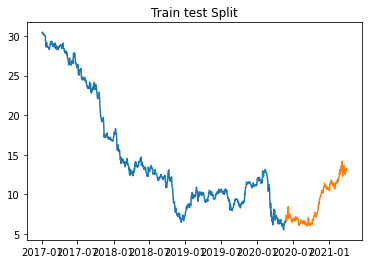

In [50]:
# Define train and test sets according to the index found above
train = prices[:cutoff]
test = prices[cutoff:]

fig, ax = plt.subplots()
ax.plot(train)
ax.plot(test)
ax.set_title('Train test Split');

In [51]:
sari_mod_test = SARIMAX(train,
                  order=(2, 1, 2),
                  seasonal_order=(2, 1, 2, 52),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

In [ ]:
y_hat_train = sari_mod.predict(typ='levels')
y_hat_test = sari_mod.predict(start=test.index[0], end=test.index[-1],typ='levels')

fig, ax = plt.subplots(figsize = (10,8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.plot(y_hat_train, label='train_pred')
ax.plot(y_hat_test, label='test_pred')
\
ax.set_title(f'GE Stock Train vs Test\n Using SARIMAX(2, 1, 2)x(2, 1, 2, 52)', fontdict = {'fontsize': 16})
plt.legend();

In [ ]:
True in ['a' in token for token in first_doc]

In [10]:
df = pd.read_csv('../Blogs/Blog 4/data/GME_intra_Mar_29_Apr_12.csv', index_col=0, parse_dates=True)

In [11]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
df.columns = ['open','high','low','close','volume']
df = df[df.index<='2021-04-10']
close = df.close

In [22]:
ticker = 'GME'

In [105]:
gme_df = yf.download(ticker, start='2020-01-01', end='2021-04-10', progress=False)

In [106]:
gme_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [107]:
gme_df.columns = ['open','high','low','close','adj close','volume']

In [112]:
gme_df['change'] = gme_df.close.diff(1)
gme_df['volume_up'] = np.where(gme_df.change >= 0, gme_df.volume, np.nan)
gme_df['volume_down'] = np.where(gme_df.change < 0, gme_df.volume, np.nan)

In [113]:
gme_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [115]:
close = gme_df.close

In [116]:
df_ma = gme_df.close.rolling(12).mean()
df_sma = gme_df.close.ewm(span=12).mean()

In [117]:
N = len(gme_df)
ind = np.arange(N)  # the evenly spaced plot indices

# next we'll write a custom formatter
def format_date(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N-1)
    return gme_df.index[thisind].strftime('%Y-%m-%d')

formatter = FuncFormatter(format_date)

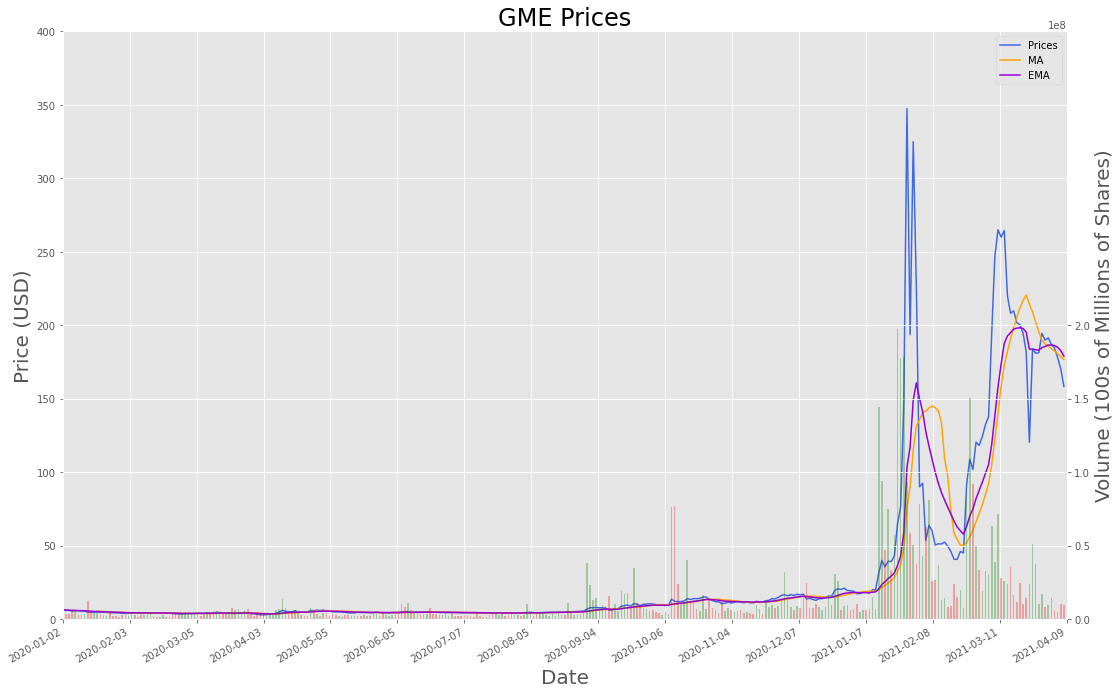

In [118]:
fig, ax = plt.subplots(figsize = (18,12))
sns.lineplot(ind, close, ax=ax, label = 'Prices', color = 'royalblue')
sns.lineplot(ind, df_ma, ax=ax, label = 'MA', color = 'orange')
sns.lineplot(ind, df_sma, ax=ax, label = 'EMA', color = 'darkviolet')
ax1 = ax.twinx()
ax1.bar(ind, gme_df.volume_up, color = 'g', width = 0.5, alpha = 0.3)
ax1.bar(ind, gme_df.volume_down, color = 'r', width = 0.5, alpha = 0.3)
ax1.set_ylim((0.0, 4e8))
ax1.set_ylabel('Volume (100s of Millions of Shares)', fontdict = {'fontsize': 20})
ax1.set_yticks([0, 0.5e8, 1e8, 1.5e8, 2e8])

# Use automatic FuncFormatter creation
ax.xaxis.set_major_formatter(formatter)
ax.set_title('GME Prices', fontdict = {'fontsize': 24})
ax.set_xlabel('Date', fontdict = {'fontsize': 20})
ax.set_ylabel('Price (USD)', fontdict = {'fontsize': 20})
ax.set_xticks(np.linspace(0,len(gme_df),16))
ax.set_xlim((0.0, len(gme_df)))
ax.set_ylim((0, 400))
fig.autofmt_xdate()
ax.legend();
plt.savefig('../Blogs/Blog 4/images/GME_Prices_Full_Year.png')

In [71]:
gme_df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-03-26', '2021-03-29', '2021-03-30', '2021-03-31',
               '2021-04-01', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09'],
              dtype='datetime64[ns]', name='Date', length=320, freq=None)

In [73]:
close = gme_df.close

In [74]:
cutoff = round(close.shape[0]*0.8)
cutoff

256

In [75]:
train = close[:cutoff]
test = close[cutoff:]

N = len(close)
N_train = len(train)
ind_train = np.arange(N_train)
# N_test = len(test)
ind_test = np.arange(N_train, N)

def format_date_gme(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N-1)
    return close.index[thisind].strftime('%Y-%m-%d')

formatter_gme = FuncFormatter(format_date_gme)

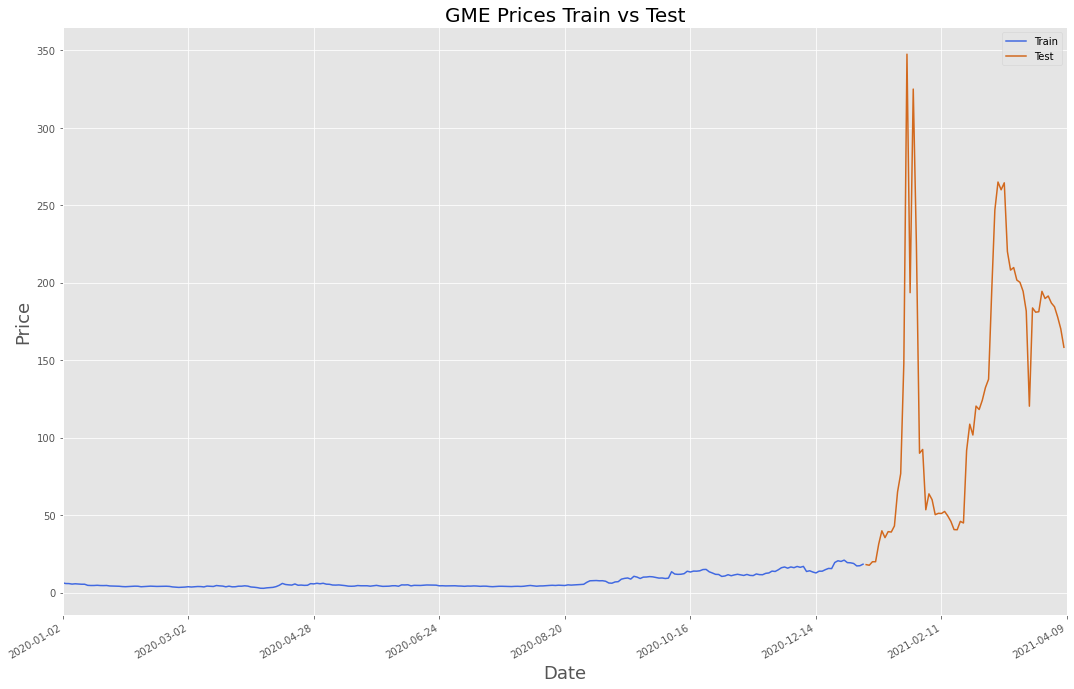

In [76]:
fig, ax = plt.subplots(figsize = (18,12))
sns.lineplot(ind_train, train, ax=ax, label = 'Train', color = 'royalblue')
sns.lineplot(ind_test, test, ax=ax, label = 'Test', color = 'chocolate')

# Use automatic FuncFormatter creation
ax.xaxis.set_major_formatter(formatter_gme)
ax.set_title('GME Prices Train vs Test', fontdict = {'fontsize': 20})
ax.set_xlabel('Date', fontdict = {'fontsize': 18})
ax.set_ylabel('Price', fontdict = {'fontsize': 18})
ax.set_xticks(np.linspace(0,N,9))
ax.set_xlim((0.0, N))
# ax.set_ylim((145, 205))
fig.autofmt_xdate()
ax.legend();
plt.savefig('../Blogs/Blog 4/images/GME_Prices_Full_Year_Train_Test.png')

In [79]:
close = close.asfreq('B')

In [80]:
cutoff = round(close.shape[0]*0.8)
cutoff

train = close[:cutoff]
test = close[cutoff:]

N = len(close)
N_train = len(train)
ind_train = np.arange(N_train)
# N_test = len(test)
ind_test = np.arange(N_train, N)

def format_date_gme(x, pos=None):
    thisind = np.clip(int(x + 0.5), 0, N-1)
    return close.index[thisind].strftime('%Y-%m-%d')

formatter_gme = FuncFormatter(format_date_gme)

In [83]:
sari_mod_tts = SARIMAX(train,
                  order=(0, 1, 1),
                  seasonal_order=(0, 1, 1, 30),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

In [85]:
train

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [86]:
test

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [87]:
# y_hat_train = sari_mod_tts.predict(typ='levels')
y_hat_test = sari_mod_tts.predict(start=test.index[0], end=test.index[-1],typ='levels')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

NameError: name 'y_hat_train' is not defined

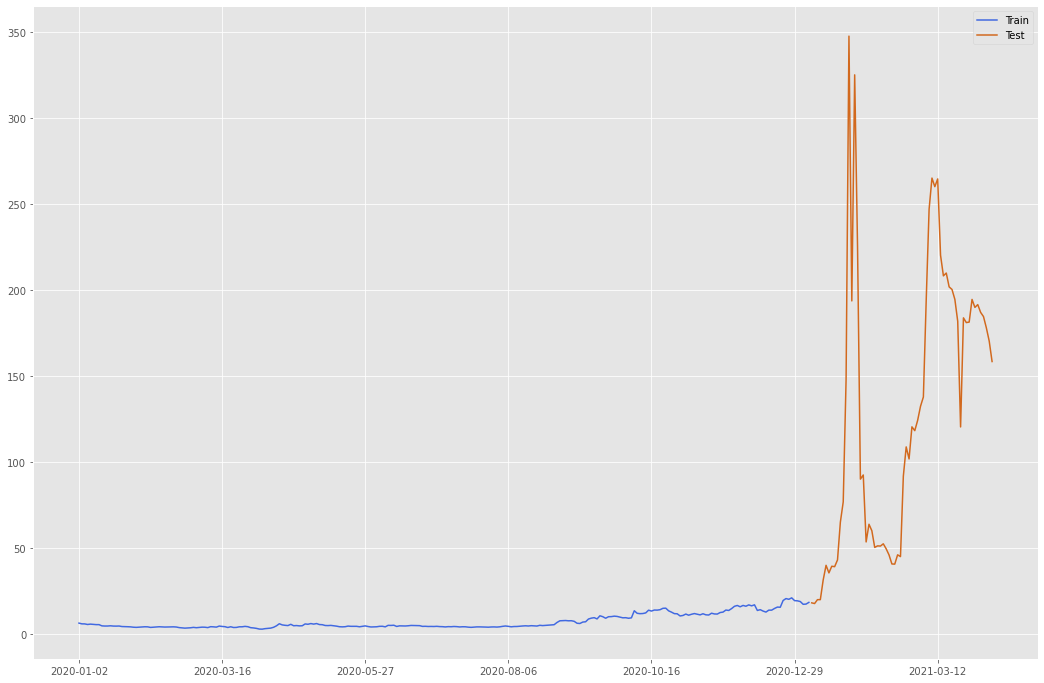

In [77]:
fig, ax = plt.subplots(figsize = (18,12))
ax.xaxis.set_major_formatter(formatter_gme)
sns.lineplot(ind_train, train, ax=ax, label = 'Train', color = 'royalblue')
sns.lineplot(ind_test, test, ax=ax, label = 'Test', color = 'chocolate')
sns.lineplot(ind_train, y_hat_train, ax=ax, label = 'Train Predictions', color = 'green')
sns.lineplot(ind_test, y_hat_test, ax=ax, label = 'Test Predictions', color = 'red')

ax.set_title('GME Prices Train vs Test and Predictions', fontdict = {'fontsize': 20})
ax.set_xlabel('Date', fontdict = {'fontsize': 18})
ax.set_ylabel('Price', fontdict = {'fontsize': 18})
ax.set_xticks(np.linspace(0,len(gme_close),9))
ax.set_xlim((0.0, len(gme_close)))
# ax.set_ylim((145, 205))
fig.autofmt_xdate()
ax.legend();
plt.savefig('images/GME_Prices_Year_Train_Test_Pred.png')

In [90]:
close

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [121]:
close = close.asfreq('d')

In [122]:
close.isna().sum()

144

In [97]:
close = gme_df.close

In [124]:
sari_mod = SARIMAX(close,
                  order=(0, 1, 1),
                  seasonal_order=(0, 1, 1, 31),
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()

In [125]:
forecast = sari_mod.forecast(steps=30)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [133]:
x = np.linspace(0,100,101)

In [139]:
np.random.normal()

101.6792751002587

In [140]:
y = [x + np.random.normal() for x in x]

In [142]:
y;

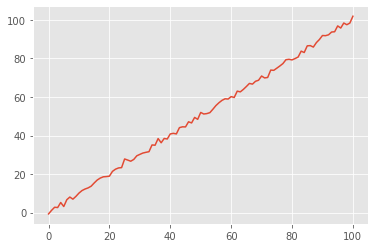

In [143]:
plt.plot(y)

In [145]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(y)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                         'p-value', '#Lags Used',
                                         'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print (dfoutput)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [149]:
filter = [[10,10,10,],[0,0,0],[-10,-10,-10]]

In [151]:
image = [[200, 200, 200, 200, 200], [200, 200, 200, 200, 200], [200, 200, 200, 200, 200], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

In [148]:
filter

[[10, 10, 10], [0, 0, 0], [-10, -10, -1]]

In [152]:
image

[[200, 200, 200, 200, 200],
 [200, 200, 200, 200, 200],
 [200, 200, 200, 200, 200],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [155]:
from scipy.ndimage import convolve
convolve(image, filter)

array([[    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0],
       [-6000, -6000, -6000, -6000, -6000],
       [-6000, -6000, -6000, -6000, -6000],
       [    0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0]])

In [24]:
rmse_lst2 = np.array[164536.70576040685,
 177819.6923486183,
 195738.31858085928,
 197938.8659271594,
 181240.70932901822,
 201663.84274835075,
 197300.46774067826,
 297981.2633628348,
 89129.00903379169,
 212304.29197493516,
 178324.96526477914,
 146064.52460585383,
 164887.82432425034,
 56204.79713541061,
 88623.51122190962,
 60414.038618928615,
 172197.25454153103,
 121778.79410402646,
 229339.3784823227,
 182148.24846643745,
 161122.7212358211,
 194751.77843027667,
 143148.24846643745,
 151122.7212358211,
 118873.74451892816]

In [30]:
rmse1 = np.array(rmse_lst)

In [31]:
rmse1

array([164536.70576041, 177819.69234862, 195738.31858086, 197938.86592716,
       181240.70932902, 201663.84274835, 197300.46774068, 297981.26336283,
        89129.00903379, 212304.29197494, 178324.96526478, 146064.52460585,
       164887.82432425,  56204.79713541,  88623.51122191,  60414.03861893,
       172197.25454153, 121778.79410403, 229339.37848232, 182148.24846644,
       161122.72123582, 194751.77843028, 118873.74451893])

In [ ]:
x=np.ink

In [26]:
rmse_dict = {}
rmse_dict[x] = rmse_lst
rmse_dict[x2] = rmse_lst2

In [27]:
rmse_dict

{12345: [164536.70576040685,
  177819.6923486183,
  195738.31858085928,
  197938.8659271594,
  181240.70932901822,
  201663.84274835075,
  197300.46774067826,
  297981.2633628348,
  89129.00903379169,
  212304.29197493516,
  178324.96526477914,
  146064.52460585383,
  164887.82432425034,
  56204.79713541061,
  88623.51122190962,
  60414.038618928615,
  172197.25454153103,
  121778.79410402646,
  229339.3784823227,
  182148.24846643745,
  161122.7212358211,
  194751.77843027667,
  118873.74451892816],
 23456: [164536.70576040685,
  177819.6923486183,
  195738.31858085928,
  197938.8659271594,
  181240.70932901822,
  201663.84274835075,
  197300.46774067826,
  297981.2633628348,
  89129.00903379169,
  212304.29197493516,
  178324.96526477914,
  146064.52460585383,
  164887.82432425034,
  56204.79713541061,
  88623.51122190962,
  60414.038618928615,
  172197.25454153103,
  121778.79410402646,
  229339.3784823227,
  182148.24846643745,
  161122.7212358211,
  194751.77843027667,
  118873.74

In [28]:
df = pd.DataFrame(rmse_dict)

In [29]:
df

,12345,23456
0,164536.705760,164536.705760
1,177819.692349,177819.692349
2,195738.318581,195738.318581
3,197938.865927,197938.865927
4,181240.709329,181240.709329
5,201663.842748,201663.842748
6,197300.467741,197300.467741
7,297981.263363,297981.263363
8,89129.009034,89129.009034
9,212304.291975,212304.291975
